In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [7]:
# mengambil dataset
data = pd.read_csv(r'/content/Sales Transaction v.4a.csv')

# mendapatkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78126 entries, 0 to 78125
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionNo  78126 non-null  object 
 1   Date           78126 non-null  object 
 2   ProductNo      78125 non-null  object 
 3   ProductName    78125 non-null  object 
 4   Price          78125 non-null  float64
 5   Quantity       78125 non-null  float64
 6   CustomerNo     78123 non-null  float64
 7   Country        78125 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.8+ MB


In [8]:
# Menampilkan dimensi dataset
data.shape

(78126, 8)

In [9]:
# Menampilkan dataset

data.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24.0,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18.0,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12.0,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12.0,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24.0,13069.0,United Kingdom


In [10]:
#  membersihkan dataset

# Menghapus baris terakhir (jika kosong)
data = data.iloc[:-1, :]

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Menghapus nilai null (jika ada)
data.dropna(inplace=True)

<ipython-input-10-b360df473195>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)
<ipython-input-10-b360df473195>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [11]:
# Mengganti label 'good' dengan 1 dan 'bad' dengan 0 dalam kolom 'Category'
data['Country'].replace({'United Kingdom': 1, 'Norway': 0}, inplace=True)



In [12]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,1
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,1
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,1
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,1
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,1


In [13]:
# Membuat variable untuk atribut dan label
X = data['Price'] #atribut
Y = data['Quantity'] #Label

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Membagi X dan y menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Membuat objek CountVectorizer untuk vektorisasi
vectorizer = CountVectorizer()

X_train = X_train.astype(str)
X_test = X_test.astype(str)
# Melakukan vektorisasi pada data latih dan data uji
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Melatih model DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorized, Y_train)


DecisionTreeClassifier()

In [15]:
# Melakukan prediksi pada data uji yang telah di-vektorisasi
Y_pred = tree_model.predict(X_test_vectorized)

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy:', round(acc, 5))

Accuracy: 0.31296


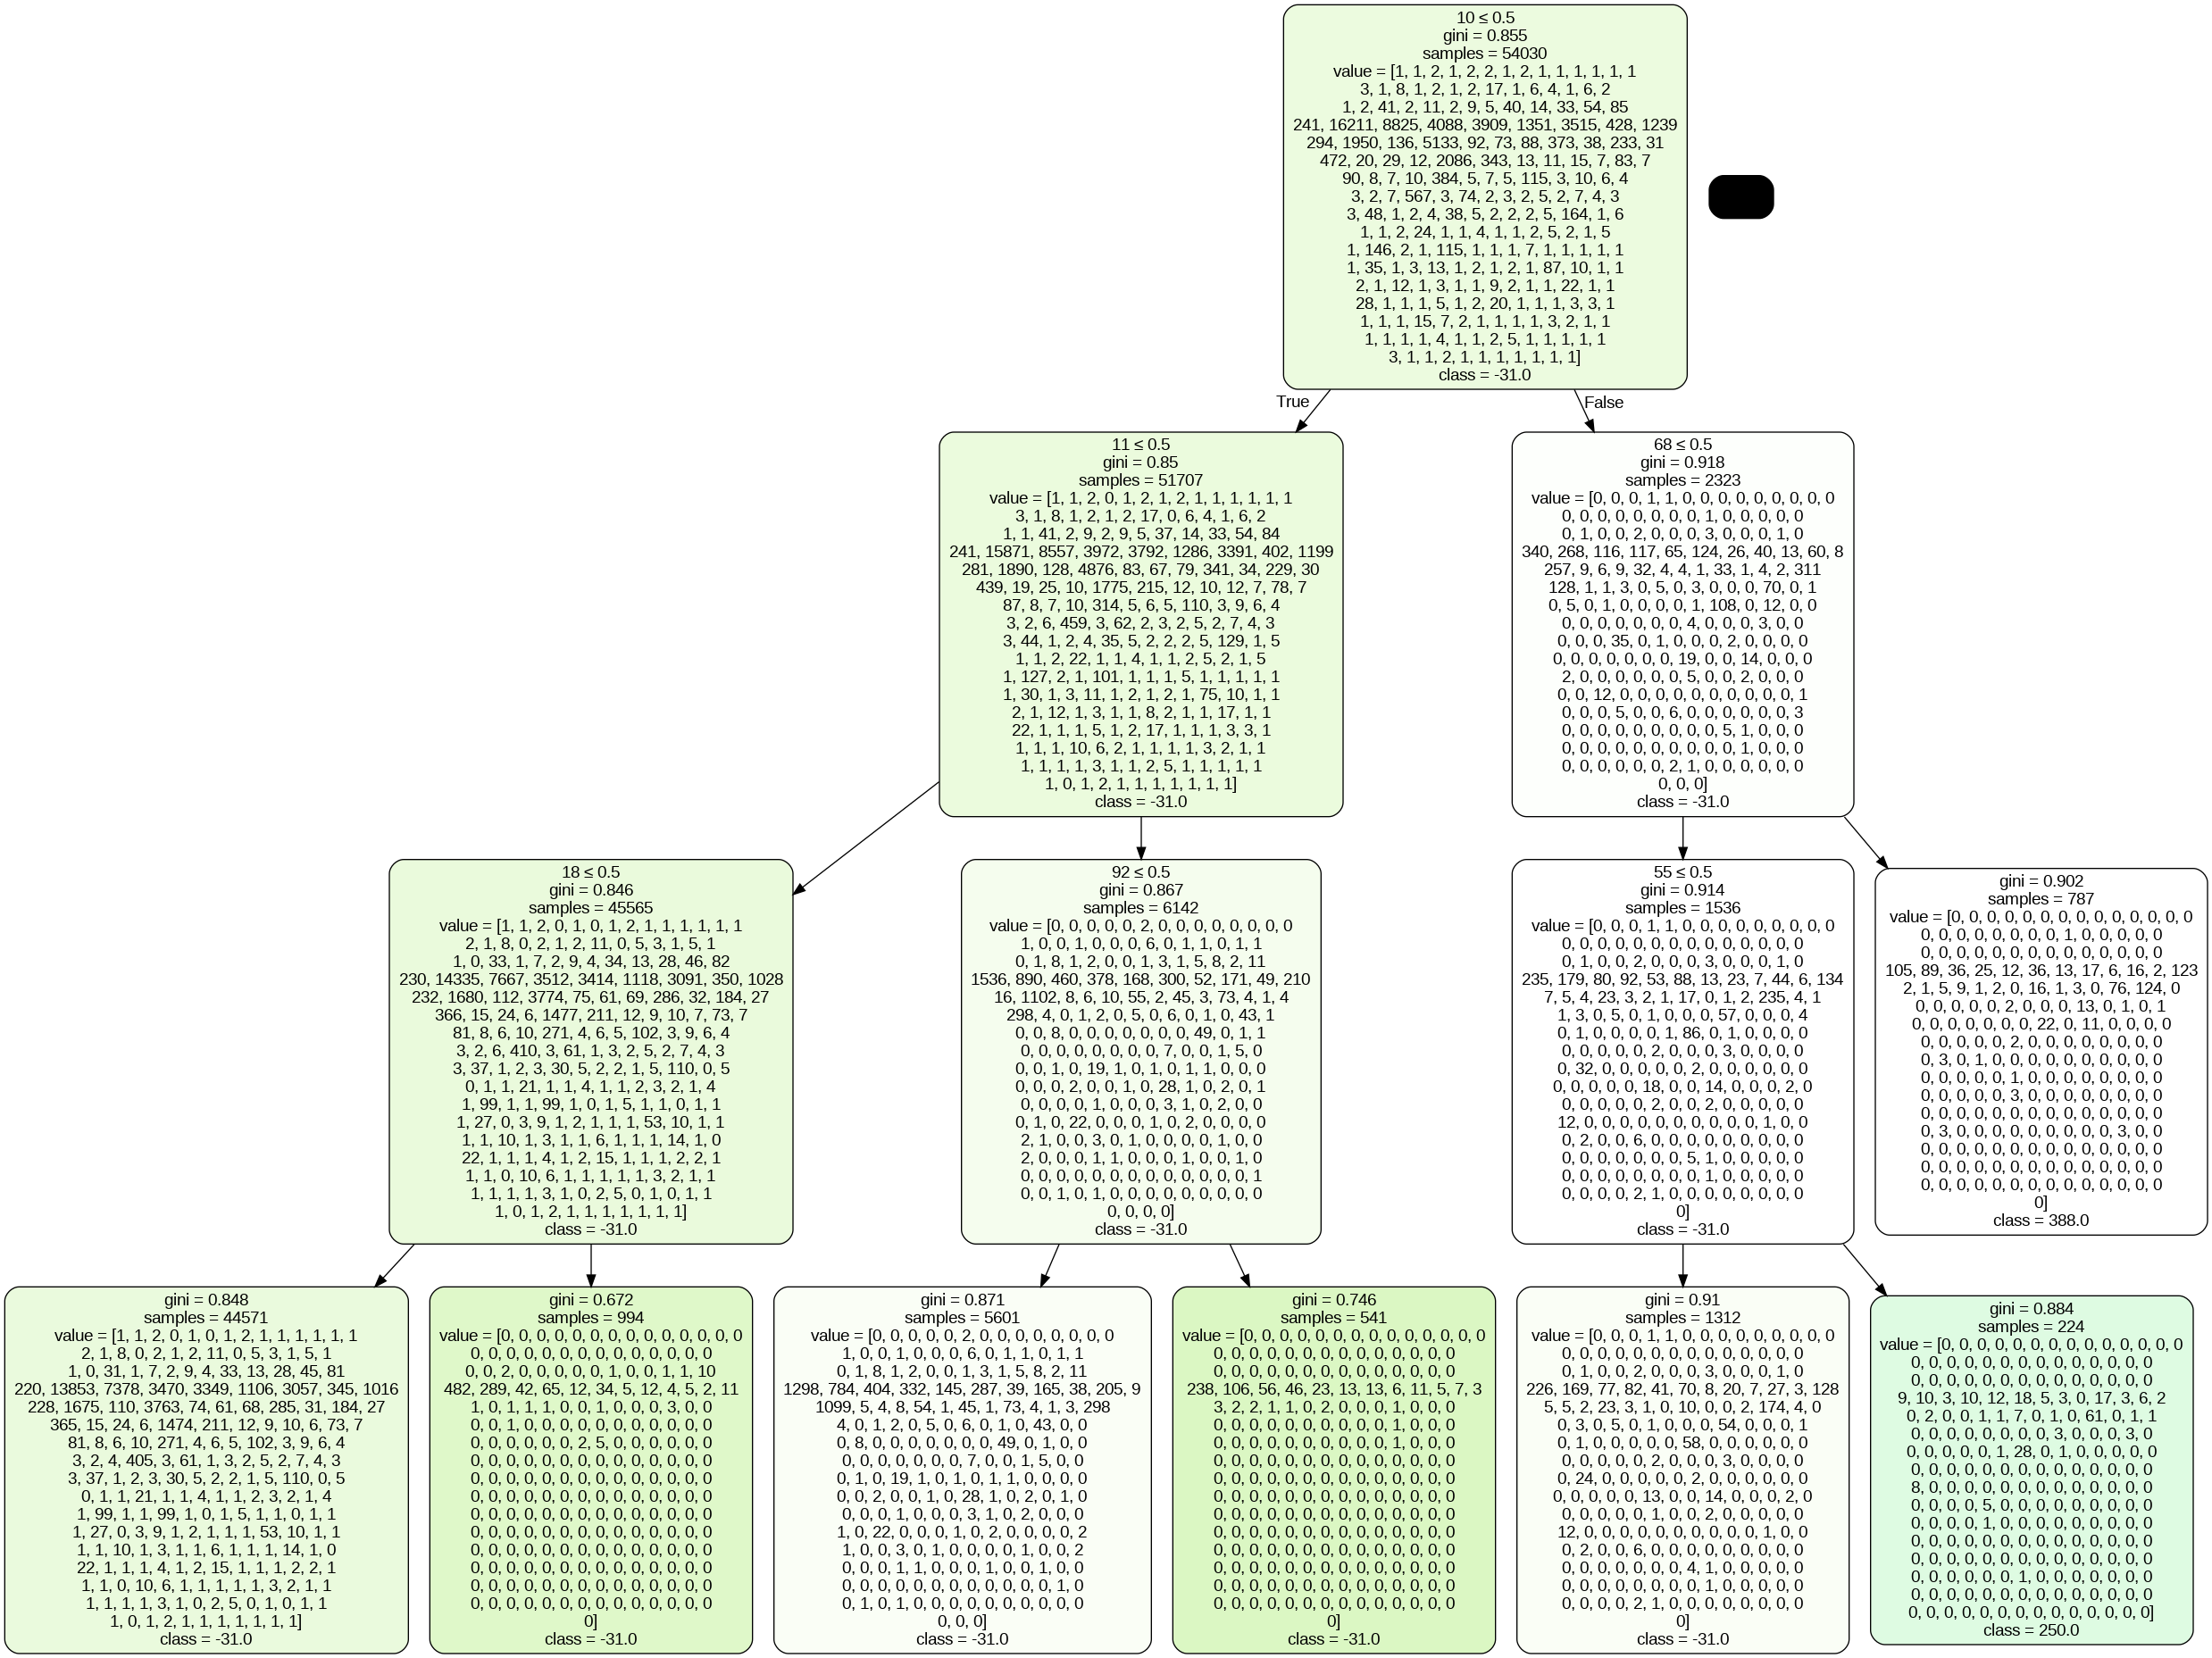

In [18]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier

# Membuat objek DecisionTreeClassifier dengan max_depth=3
tree_model = DecisionTreeClassifier(max_depth=3)

# Melatih model dengan data latih
tree_model.fit(X_train_vectorized, Y_train)

# Membuat dot data dari model DecisionTreeClassifier
dot_data = StringIO()

export_graphviz(tree_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=vectorizer.get_feature_names_out(),
                class_names=[str(class_name) for class_name in Y_train.unique()])  # Menggunakan nilai unik dari kolom yang diprediksi sebagai class_names setelah dikonversi ke string

# Membuat graph dari dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Memvisualisasikan graph
Image(graph.create_png())
